# Bid example

In [1]:

from smart_choice.datanodes import DataNodes

def payoff_fn(**kwargs):
    values = kwargs["values"]
    bid = values["bid"] if "bid" in values.keys() else 0
    competitor_bid = (
        values["competitor_bid"] if "competitor_bid" in values.keys() else 0
    )
    cost = values["cost"] if "cost" in values.keys() else 0
    return (bid - cost) * (1 if bid < competitor_bid else 0)


nodes = DataNodes()
nodes.add_decision(
    name="bid",
    branches=[
        ("low", 300, "competitor_bid"),
        ("medium", 500, "competitor_bid"),
        ("high", 700, "competitor_bid"),
        ("no-bid", 0, "profit"),
    ],
    maximize=True,
)
nodes.add_chance(
    name="competitor_bid",
    branches=[
        ("low", 0.35, 400, "cost"),
        ("medium", 0.50, 600, "cost"),
        ("high", 0.15, 800, "cost"),
    ],
)
nodes.add_chance(
    name="cost",
    branches=[
        ("low", 0.25, 200, "profit"),
        ("medium", 0.50, 400, "profit"),
        ("high", 0.25, 600, "profit"),
    ],
)
nodes.add_terminal(name="profit", payoff_fn=payoff_fn)
nodes

0  D bid             low                     300.00 competitor_bid
                     medium                  500.00 competitor_bid
                     high                    700.00 competitor_bid
                     no-bid                    0.00 profit
1  C competitor_bid  low             .3500   400.00 cost
                     medium          .5000   600.00 cost
                     high            .1500   800.00 cost
2  C cost            low             .2500   200.00 profit
                     medium          .5000   400.00 profit
                     high            .2500   600.00 profit
3  T profit

In [2]:
from smart_choice.decisiontree import DecisionTree

tree = DecisionTree(nodes=nodes)
tree

STRUCTURE     NAMES           OUTCOMES         PROBABILIES
------------------------------------------------------------------
0D1 14 27 40  bid             300 500 700 0
1C2 6 10      competitor_bid  400 600 800      .3500 .5000 .1500
2C3 4 5       cost            200 400 600      .2500 .5000 .2500
3T            profit
4T            profit
5T            profit
6C7 8 9       cost            200 400 600      .2500 .5000 .2500
7T            profit
8T            profit
9T            profit
10C11 12 13   cost            200 400 600      .2500 .5000 .2500
11T           profit
12T           profit
13T           profit
14C15 19 23   competitor_bid  400 600 800      .3500 .5000 .1500
15C16 17 18   cost            200 400 600      .2500 .5000 .2500
16T           profit
17T           profit
18T           profit
19C20 21 22   cost            200 400 600      .2500 .5000 .2500
20T           profit
21T           profit
22T           profit
23C24 25 26   cost            200 400 600      .2500 .5000 .

In [3]:
tree.display()

|
|
\---[D] #0
     | bid
     | low               300.00
     +----------------------[C] #1
     |                       | competitor_bid
     |                       | low             .3500   400.00
     |                       +----------------------------[C] #2
     |                       |                             | cost
     |                       |                             | low             .2500   200.00
     |                       |                             | medium          .5000   400.00
     |                       |                             \ high            .2500   600.00
     |                       | competitor_bid
     |                       | medium          .5000   600.00
     |                       +----------------------------[C] #6
     |                       |                             | cost
     |                       |                             | low             .2500   200.00
     |                       |                             | 

In [4]:
tree.evaluate()
tree.rollback()
tree.display()

|
|    65.00
\------[D] #0
        | bid
        | low               300.00  -100.00
        +-------------------------------[C] #1
        |                                | competitor_bid
        |                                | low             .3500   400.00  -100.00
        |                                +-------------------------------------[C] #2
        |                                |                                      | cost
        |                                |                                      | low             .2500   200.00 :   100.00 .0000
        |                                |                                      | medium          .5000   400.00 :  -100.00 .0000
        |                                |                                      \ high            .2500   600.00 :  -300.00 .0000
        |                                | competitor_bid
        |                                | medium          .5000   600.00  -100.00
        |              

In [5]:
tree.display(policy_suggestion=True)

|
|    65.00
\------[D] #0
        | bid
        > medium            500.00    65.00
        \-------------------------------[C] #14
                                         | competitor_bid
                                         | low             .3500   400.00     0.00
                                         +-------------------------------------[C] #15
                                         |                                      | cost
                                         |                                      | low             .2500   200.00 :     0.00 .0875
                                         |                                      | medium          .5000   400.00 :     0.00 .1750
                                         |                                      \ high            .2500   600.00 :     0.00 .0875
                                         | competitor_bid
                                         | medium          .5000   600.00   100.00
                     

In [6]:
tree.display(max_deep=2)

|
|    65.00
\------[D] #0
        | bid
        | low               300.00  -100.00
        +-------------------------------[C] #1
        |                                | competitor_bid
        |                                | low             .3500   400.00  -100.00
        |                                | medium          .5000   600.00  -100.00
        |                                | high            .1500   800.00  -100.00
        | bid
        > medium            500.00    65.00
        +-------------------------------[C] #14
        |                                | competitor_bid
        |                                | low             .3500   400.00     0.00
        |                                | medium          .5000   600.00   100.00
        |                                | high            .1500   800.00   100.00
        | bid
        | high              700.00    45.00
        +-------------------------------[C] #27
        |                                |

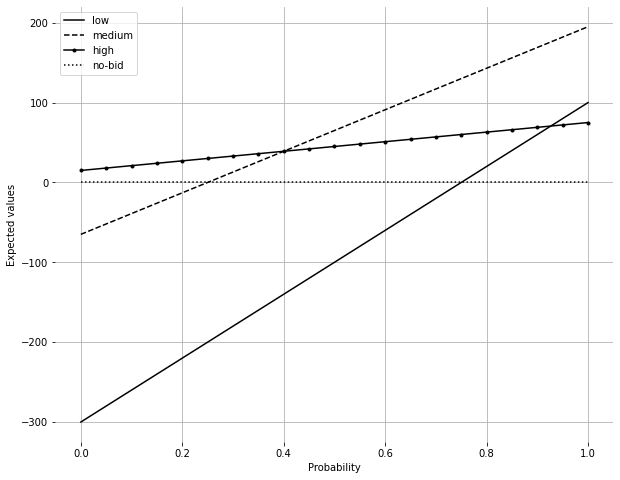

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
tree.probabilistic_sensitivity(varname="cost", plot=True)

In [8]:
plt.figure(figsize=(10, 8))
tree.value_sensitivity(name="cost", branch="high", values=(450, 750), plot=True)

,Branch,Value,ExpVal
0,low,450.0,-62.500
1,low,480.0,-70.000
2,low,510.0,-77.500
3,low,540.0,-85.000
4,low,570.0,-92.500
5,low,600.0,-100.000
6,low,630.0,-107.500
7,low,660.0,-115.000
8,low,690.0,-122.500
9,low,720.0,-130.000


<Figure size 720x576 with 0 Axes>

In [9]:
plt.figure(figsize=(10, 6))

tree.risk_sensitivity(utility_fn="exp", risk_tolerance=75, plot=True)

ValueError: Illegal format string ":-k"; two linestyle symbols

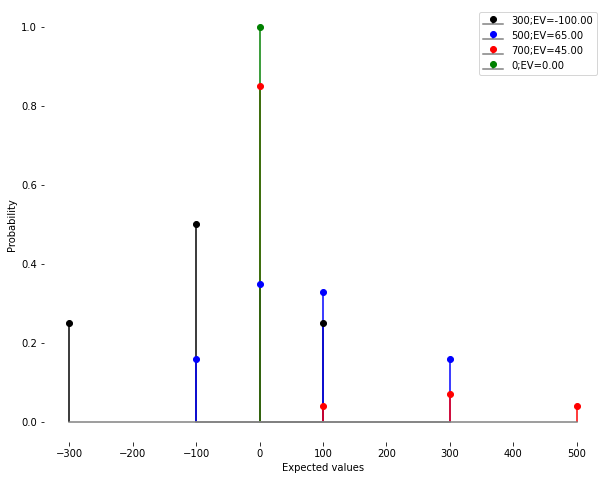

In [10]:
plt.figure(figsize=(10, 8))

tree.risk_profile(idx=0, cumulative=False, single=False, plot=True)

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))



tree
tree.rollback()
# tree.display(max_deep=1)
tree.risk_attitude_sensitivity('exp', 75)
# plt.ylim(0, 75)

# tree.nodes()
#tree.evaluate()
#tree.rollback()
# tree.nodes()
# tree.risk_profile(0, cumulative=True, single=False)


AttributeError: 'DecisionTree' object has no attribute 'risk_attitude_sensitivity'